# Chapter 02 Frequency Domain

[Time-Frequency Pairs](https://pysdr.org/content/frequency_domain.html#time-frequency-pairs)

> While the time domain demonstrates how a signal changes over time, the frequency domain displays how much of a signal rests in which frequencies.

[Fast Fourier Transform](https://pysdr.org/content/frequency_domain.html#fast-fourier-transform-fft)


> Regarding the frequency interval, each bin corresponds to f_s/N Hz, i.e., feeding in more samples to each FFT will lead to more granular resolution in your output. 

This can be seen practically in SDR software when increasing the FFT sample size... e.g the frequency graph becomes more detailed.
We're seeing more samples per unit time.

In [271]:
import numpy as np
import matplotlib.pyplot as plt

"""
Helper method to generate a plot with 0 as a reference line.
"""
def plotPretty(x, y=None, title=None):
    if title != None:
        plt.suptitle(title)

    plt.axhline(0, color='grey', linestyle='--') 

    if y is None:
        plt.plot(x, marker = '.')
    else:
        plt.plot(x, y, marker = '.')

    plt.show()

    return True

"""
REF: https://pysdr.org/content/frequency_domain.html#spectrogram-waterfall
"""
def addNoise(waveform, noiseLevel=0.2):
    synthetic_noise = noiseLevel*np.random.randn(len(waveform))
    return waveform + synthetic_noise

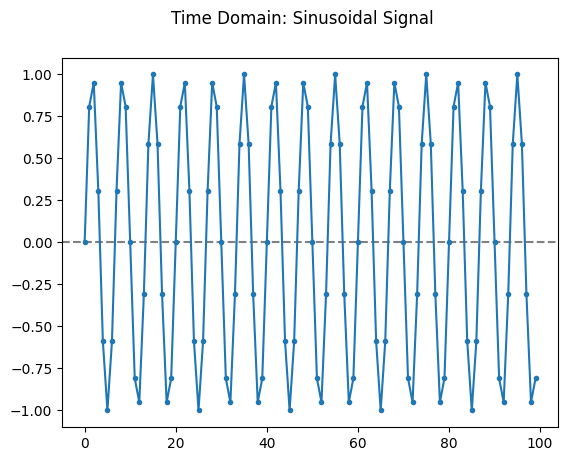

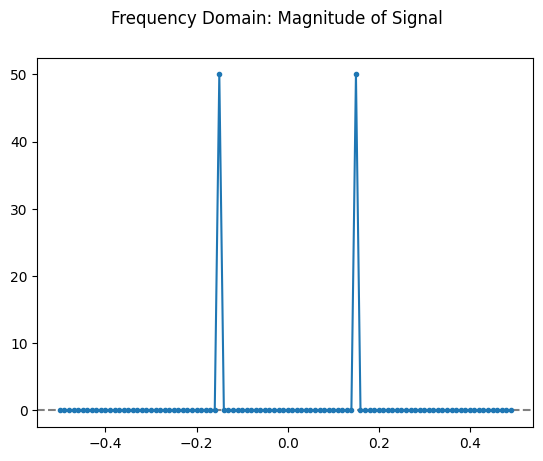

In [272]:
# REF: https://pysdr.org/content/frequency_domain.html#fft-in-python

def pySDRExample1():
    signalFreqHz = 0.15
    sampleRateHz = 1
    sampleSize = 100 # Assume one sample per second (1 hz)

    t = np.arange(sampleSize) # time domain samples
    s = np.sin(signalFreqHz*2*np.pi*t) # Assumes one sample per second
    plotPretty(s, title="Time Domain: Sinusoidal Signal")

    S = np.fft.fft(s) # Calculate the FFT from time domain.
    S = np.fft.fftshift(S) # Shift the FFT to center around 0.
    S_mag = np.abs(S)
    S_phase = np.angle(S)

    f = np.arange(sampleRateHz/-2, sampleRateHz/2, sampleRateHz/sampleSize) # Create actual bandwidth x-axis labels.
    plotPretty(f, S_mag, "Frequency Domain: Magnitude of Signal")

pySDRExample1()

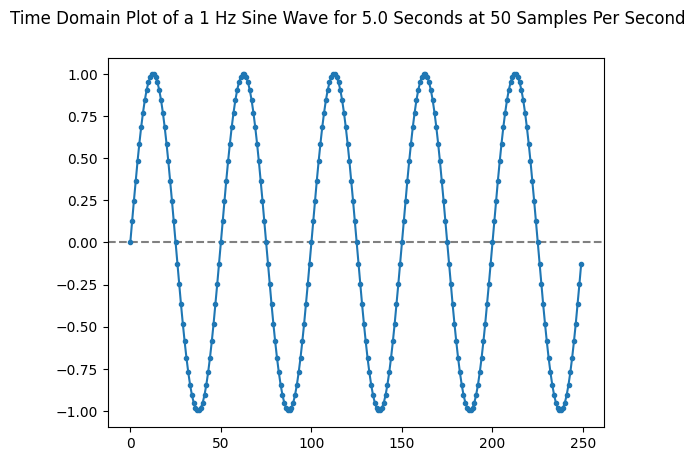

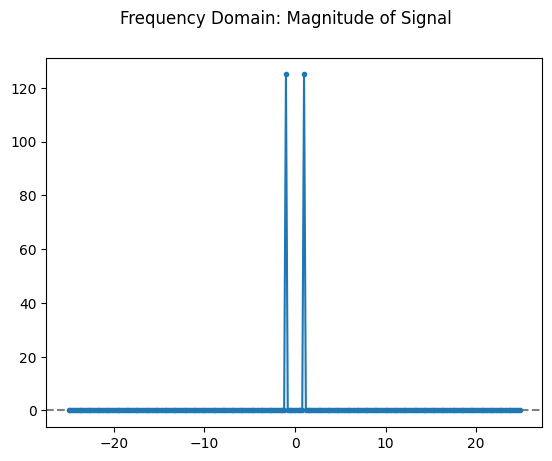

In [273]:
# Ref: https://www.youtube.com/watch?v=dNJ171EsoNQ

def aliciaScienceReference():
    # Samples Per Second
    sps = 50
    # frequency
    signal_freq_hz = 1
    # Duration
    duration_s = 5.0

    each_sample_number = np.arange(duration_s * sps)
    waveform = np.sin(2 * np.pi * each_sample_number * signal_freq_hz / sps)

    title = "Time Domain Plot of a {0} Hz Sine Wave for {1} Seconds at {2} Samples Per Second".format(signal_freq_hz, duration_s, sps)
    plotPretty(waveform, title=title)

    waveformFFT = np.fft.fft(waveform) # Calculate the FFT from time domain.
    waveformFFT = np.fft.fftshift(waveformFFT) # Shift the FFT to center around 0.
    waveformFFT_mag = np.abs(waveformFFT)
    freqDomain_xaxis = np.arange(sps/-2, sps/2, sps/(duration_s * sps)) # Create actual bandwidth x-axis labels.
    plotPretty(freqDomain_xaxis, waveformFFT_mag, title="Frequency Domain: Magnitude of Signal")

aliciaScienceReference()

In the above graphic, we're plotting a sine wave at one hertz (`freq_hz`), or one cycle per second.

We're sampling 50 times per second `sps` over five seconds `duration_s` in the time domain.

Therefore, in the x-axis, every 50 units represents one second. And we can see that the period of the sine wave completes at `0`, `50`, `100`, etc.

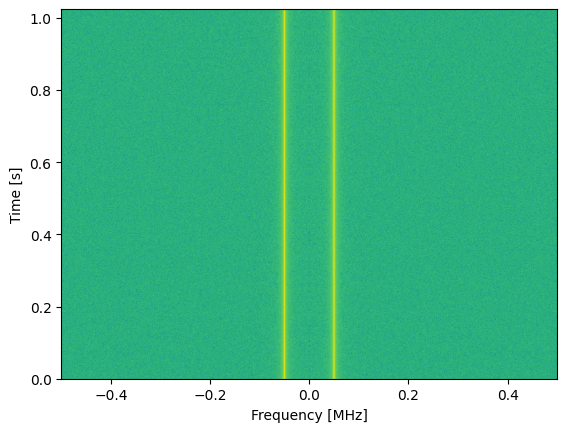

In [274]:
# REF: https://pysdr.org/content/frequency_domain.html#spectrogram-waterfall

def spectrogram():
    sample_rate = 1e6

    # Generate tone plus noise
    t = np.arange(1024*1000)/sample_rate # time vector
    f = 50e3 # freq of tone
    x = np.sin(2*np.pi*f*t) + 0.2*np.random.randn(len(t))

    # simulate the signal above, or use your own signal

    fft_size = 1024
    num_rows = len(x) // fft_size # // is an integer division which rounds down
    spectrogram = np.zeros((num_rows, fft_size))
    for i in range(num_rows):
        spectrogram[i,:] = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)

    plt.imshow(spectrogram, aspect='auto', extent = [sample_rate/-2/1e6, sample_rate/2/1e6, 0, len(x)/sample_rate])
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Time [s]")
    plt.show()

spectrogram()

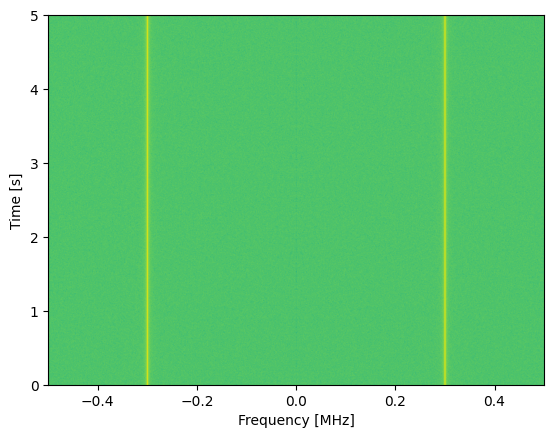

In [275]:
# REF: https://pysdr.org/content/frequency_domain.html#spectrogram-waterfall

def spectrogramCustomSignal():
    SAMPLES_PER_SECOND = 1000000
    DURATION_S = 5.0
    SIGNAL_FREQ_HZ = 300000

    # Generate tone plus noise
    each_sample_number = np.arange(DURATION_S * SAMPLES_PER_SECOND) # time vector
    waveform = np.sin(2 * np.pi * each_sample_number * SIGNAL_FREQ_HZ / SAMPLES_PER_SECOND)
    waveform = addNoise(waveform)

    # simulate the signal above, or use your own signal

    fft_size = 1024
    num_rows = len(waveform) // fft_size # // is an integer division which rounds down
    spectrogram = np.zeros((num_rows, fft_size))
    for i in range(num_rows):
        spectrogram[i,:] = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(waveform[i*fft_size:(i+1)*fft_size])))**2)

    plt.imshow(spectrogram, aspect='auto', extent = [SAMPLES_PER_SECOND/-2/1e6, SAMPLES_PER_SECOND/2/1e6, 0, len(waveform)/SAMPLES_PER_SECOND])
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Time [s]")
    plt.show()

spectrogramCustomSignal()